In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("Round2_DiveInData_Dataset.csv")

In [19]:
data = data.drop(["Phone_No","Known_for","Address"],axis=1)

In [20]:
data = data.fillna(0)

In [21]:
col = []
for i in range(len(data)):
    col.append(int(data.iloc[i].Pricing_for_2people[3:-2]))
data["price"] = col

In [22]:
data = data.drop(["Pricing_for_2people"],axis=1)

In [23]:
data.Category

0                  North Indian, BBQ, Fast Food, Desserts
1       North Indian, Mughlai, Maharashtrian, Biryani,...
2       Italian, Continental, Chinese, Mexican, Fast F...
3       South Indian, Street Food, Fast Food, Beverage...
4                      Asian, Mediterranean, North Indian
                              ...                        
4792                                          Street Food
4793                       Beverages, Desserts, Ice Cream
4794                            Pizza, Italian, Fast Food
4795                          Burger, Sandwich, Fast Food
4796                                              Chinese
Name: Category, Length: 4797, dtype: object

In [24]:
all_tickers = list()
for ticker in data.Category:
    all_tickers.append((ticker.split(',')))
    
data["a"] = all_tickers

a = []
for cat in all_tickers:
    for i in cat:
        a.append(i)
categories = set(a)

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

x = pd.DataFrame(mlb.fit_transform(data["a"]),columns=categories)

data = data.drop(["a","Category"],axis=1)

In [25]:
data.to_csv("le_aayush.csv")

In [26]:
data[data.Dining_Review_Count==0]

,Restaurant#,Restaurant Name,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price
4793,RESTPUNE4794,The Thickshake Factory,"Pimpri, Pune",3.6,0,4.0,1,400
4794,RESTPUNE4795,Izletes Pizza,"Bhosari, Pune",3.5,0,4.0,562,400
4795,RESTPUNE4796,Burger Express,"Hadapsar, Pune",3.5,0,3.7,44,300
4796,RESTPUNE4797,China Town,"Undri, Pune",3.2,0,3.8,0,300


In [27]:
data = data.drop(data[data.Dining_Review_Count==0].index)

In [28]:
data.Delivery_Rating_Count<10

0       False
1       False
2       False
3       False
4        True
        ...  
4788     True
4789     True
4790    False
4791    False
4792     True
Name: Delivery_Rating_Count, Length: 4793, dtype: bool

In [29]:
a = data.groupby("Locality")["Restaurant#"].nunique()

In [30]:
a[a<5]

Locality
 ABC Farms,Mundhwa, Pune               1
 Abhiruchi Mall, Sinhgad Road, Pune    1
 Aditi Mall, Baner Road, Pune          1
 Aditya Shagun Mall, Bavdhan, Pune     3
 Ambrosia Resort and Spa, Pune         2
                                      ..
 The Westin, Mundhwa, Pune             3
 Villa Casa, Pimple Gurav, Pune        2
 Vivanta Pune, Hinjewadi, Pune         1
 Westend Mall, Aundh, Pune             2
 White Square, Hinjawadi, Pune         2
Name: Restaurant#, Length: 94, dtype: int64

In [435]:
data

,Restaurant#,Restaurant Name,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price
0,RESTPUNE0001,AB's - Absolute Barbecues,"White Square, Hinjawadi, Pune",4.7,8152,3.5,304,1200
1,RESTPUNE0002,Cafe Goodluck,"Deccan Gymkhana, Pune",4.4,6261,4.1,33300,800
2,RESTPUNE0003,Darshan,"Baner, Pune",4.6,6218,3.9,3332,800
3,RESTPUNE0004,Vaishali,"FC Road, Pune",4.5,5720,4.3,2200,500
4,RESTPUNE0005,Flechazo,"Wakad, Pune",4.5,5184,0.0,0,1400
...,...,...,...,...,...,...,...,...
4792,RESTPUNE4793,Misalwala Worlds Favourite Curry,"Wakad, Pune",3.4,1,3.7,1,200
4793,RESTPUNE4794,The Thickshake Factory,"Pimpri, Pune",3.6,0,4.0,1,400
4794,RESTPUNE4795,Izletes Pizza,"Bhosari, Pune",3.5,0,4.0,562,400
4795,RESTPUNE4796,Burger Express,"Hadapsar, Pune",3.5,0,3.7,44,300


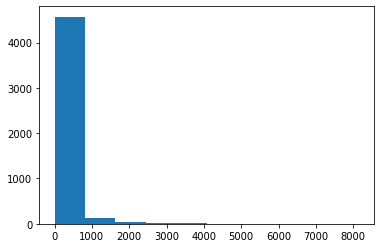

In [436]:
plt.hist(data.Dining_Review_Count)
plt.show()

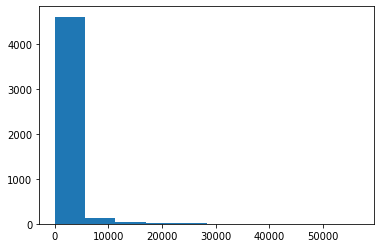

In [437]:
plt.hist(data.Delivery_Rating_Count)
plt.show()

In [438]:
SR = []

In [439]:
n = len(data)
for i in range(n):
    if(data.iloc[i].Delivery_Rating_Count>10000):
        SR.append(i)
        
for i in range(n):
    if(data.iloc[i].Dining_Review_Count>1000):
        SR.append(i)

In [414]:
data = data.drop(SR)

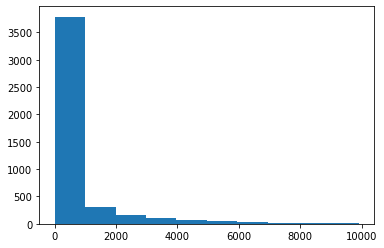

In [385]:
plt.hist(data.Delivery_Rating_Count)
plt.show()

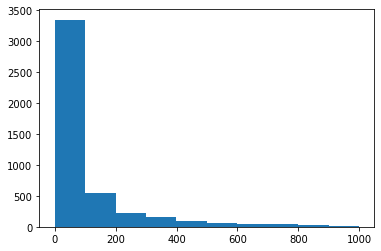

In [386]:
plt.hist(data.Dining_Review_Count)
plt.show()

In [387]:
data

,Restaurant#,Restaurant Name,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price
182,RESTPUNE0183,Urbo,"Baner, Pune",4.2,999,0.0,2,1700
184,RESTPUNE0185,Idlicious,"Baner, Pune",4.4,987,4.2,357,250
185,RESTPUNE0186,The Daily All Day,"Koregaon Park, Pune",4.5,980,4.2,729,2000
186,RESTPUNE0187,Cafe 24,"Della Adventure Resort, Pune",4.4,980,0.0,0,2200
187,RESTPUNE0188,Hotel Shreyas,"Deccan Gymkhana, Pune",4.3,968,4.2,1693,500
...,...,...,...,...,...,...,...,...
4792,RESTPUNE4793,Misalwala Worlds Favourite Curry,"Wakad, Pune",3.4,1,3.7,1,200
4793,RESTPUNE4794,The Thickshake Factory,"Pimpri, Pune",3.6,0,4.0,1,400
4794,RESTPUNE4795,Izletes Pizza,"Bhosari, Pune",3.5,0,4.0,562,400
4795,RESTPUNE4796,Burger Express,"Hadapsar, Pune",3.5,0,3.7,44,300


In [440]:
a = data.loc[SR]

In [444]:
len(a[a.Dining_Rating>4.5])

30

In [449]:
len(a[a.Delivery_Rating>4.2])

22

In [352]:
len(SR)

73

In [474]:
all_tickers = list()
for ticker in data.Locality:
    all_tickers.append((ticker.split(',')))
    
data["a"] = all_tickers

In [484]:
ll = []
for i in data.a:
    ll.append(i[-2])
    
data.Locality = ll
data.drop(['a'],axis=1)

,Restaurant#,Restaurant Name,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price
0,RESTPUNE0001,AB's - Absolute Barbecues,Hinjawadi,4.7,8152,3.5,304,1200
1,RESTPUNE0002,Cafe Goodluck,Deccan Gymkhana,4.4,6261,4.1,33300,800
2,RESTPUNE0003,Darshan,Baner,4.6,6218,3.9,3332,800
3,RESTPUNE0004,Vaishali,FC Road,4.5,5720,4.3,2200,500
4,RESTPUNE0005,Flechazo,Wakad,4.5,5184,0.0,0,1400
...,...,...,...,...,...,...,...,...
4792,RESTPUNE4793,Misalwala Worlds Favourite Curry,Wakad,3.4,1,3.7,1,200
4793,RESTPUNE4794,The Thickshake Factory,Pimpri,3.6,0,4.0,1,400
4794,RESTPUNE4795,Izletes Pizza,Bhosari,3.5,0,4.0,562,400
4795,RESTPUNE4796,Burger Express,Hadapsar,3.5,0,3.7,44,300


In [486]:
data = data.set_index('Restaurant#')

In [487]:
data

,Restaurant Name,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price,a
Restaurant#,,,,,,,,
RESTPUNE0001,AB's - Absolute Barbecues,Hinjawadi,4.7,8152,3.5,304,1200,"[ White Square, Hinjawadi, Pune]"
RESTPUNE0002,Cafe Goodluck,Deccan Gymkhana,4.4,6261,4.1,33300,800,"[ Deccan Gymkhana, Pune]"
RESTPUNE0003,Darshan,Baner,4.6,6218,3.9,3332,800,"[ Baner, Pune]"
RESTPUNE0004,Vaishali,FC Road,4.5,5720,4.3,2200,500,"[ FC Road, Pune]"
RESTPUNE0005,Flechazo,Wakad,4.5,5184,0.0,0,1400,"[ Wakad, Pune]"
...,...,...,...,...,...,...,...,...
RESTPUNE4793,Misalwala Worlds Favourite Curry,Wakad,3.4,1,3.7,1,200,"[ Wakad, Pune]"
RESTPUNE4794,The Thickshake Factory,Pimpri,3.6,0,4.0,1,400,"[ Pimpri, Pune]"
RESTPUNE4795,Izletes Pizza,Bhosari,3.5,0,4.0,562,400,"[ Bhosari, Pune]"


In [496]:
data[5:6].index

Index(['RESTPUNE0006'], dtype='object', name='Restaurant#')

(array([ 343.,  818.,  979., 1014.,  778.,  466.,  246.,  104.,   35.,
          14.]),
 array([3.  , 3.19, 3.38, 3.57, 3.76, 3.95, 4.14, 4.33, 4.52, 4.71, 4.9 ]),
 <a list of 10 Patch objects>)

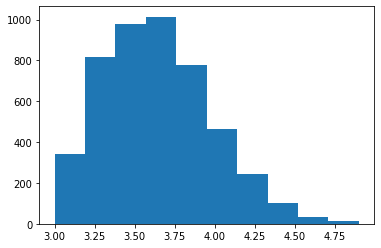

In [497]:
plt.hist(data.Dining_Rating)

(array([   2.,    7.,   28.,   73.,  214.,  422.,  596., 1198.,  509.,
         177.]),
 array([2.4 , 2.61, 2.82, 3.03, 3.24, 3.45, 3.66, 3.87, 4.08, 4.29, 4.5 ]),
 <a list of 10 Patch objects>)

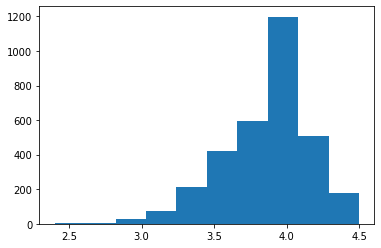

In [500]:
plt.hist(data[data.Delivery_Rating>1].Delivery_Rating)

In [509]:
X = data.Dining_Rating
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [511]:
X_std

Restaurant#
RESTPUNE0001    0.777778
RESTPUNE0002    0.911111
RESTPUNE0003    0.866667
RESTPUNE0004    0.955556
RESTPUNE0005    0.000000
                  ...   
RESTPUNE4793    0.822222
RESTPUNE4794    0.888889
RESTPUNE4795    0.888889
RESTPUNE4796    0.822222
RESTPUNE4797    0.844444
Name: Delivery_Rating, Length: 4797, dtype: float64

In [512]:
data[data.Delivery_Rating==0.0]

,Restaurant Name,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price,a
Restaurant#,,,,,,,,
RESTPUNE0005,Flechazo,Wakad,4.5,5184,0.0,0,1400,"[ Wakad, Pune]"
RESTPUNE0009,Agent Jack's,Hadapsar,4.4,4398,0.0,0,1500,"[ Amanora Town Centre, Hadapsar, Pune]"
RESTPUNE0016,The Ruby Hilltop - Sunny's World,Sus,4.4,3860,0.0,0,1300,"[ Sus, Pune]"
RESTPUNE0021,Barbeque Ville,Wakad,4.4,3761,0.0,0,1000,"[ Wakad, Pune]"
RESTPUNE0023,Apache High Street,Baner,4.3,3663,0.0,0,1100,"[ Balewadi High Street, Baner, Pune]"
...,...,...,...,...,...,...,...,...
RESTPUNE4785,Jorden Biryani,Akurdi,3.1,4,0.0,0,300,"[ Akurdi, Pune]"
RESTPUNE4786,Vaijnath Amrutulya Hotel,Pimpri,3.1,4,0.0,0,400,"[ Pimpri, Pune]"
RESTPUNE4788,Hotel Khawa,Wagholi,3.1,4,0.0,0,450,"[ Wagholi, Pune]"


In [513]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['Locality']= label_encoder.fit_transform(data['Locality'])

In [515]:
data = data.drop(['a'],axis=1)

In [517]:
data = data.drop(['Restaurant Name'],axis=1)

In [518]:
data

,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price
Restaurant#,,,,,,
RESTPUNE0001,38,4.7,8152,3.5,304,1200
RESTPUNE0002,21,4.4,6261,4.1,33300,800
RESTPUNE0003,6,4.6,6218,3.9,3332,800
RESTPUNE0004,33,4.5,5720,4.3,2200,500
RESTPUNE0005,111,4.5,5184,0.0,0,1400
...,...,...,...,...,...,...
RESTPUNE4793,111,3.4,1,3.7,1,200
RESTPUNE4794,82,3.6,0,4.0,1,400
RESTPUNE4795,9,3.5,0,4.0,562,400


In [523]:
x = x.set_index(data.index)

In [560]:
dataset = pd.concat([data, x],axis = 1)
data = pd.concat([data, x],axis = 1)

In [526]:
dataset = dataset[dataset.Delivery_Rating!=0.0]

In [527]:
dataset

,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,price,Malwani,Hot dogs,Bakery,Pizza,...,Finger Food,Malaysian,Brazilian,Konkan,Kebab,North Indian,Chettinad,German,French,Maharashtrian
Restaurant#,,,,,,,,,,,,,,,,,,,,,
RESTPUNE0001,38,4.7,8152,3.5,304,1200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE0002,21,4.4,6261,4.1,33300,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE0003,6,4.6,6218,3.9,3332,800,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE0004,33,4.5,5720,4.3,2200,500,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
RESTPUNE0006,54,4.7,4830,4.2,5950,1500,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESTPUNE4793,111,3.4,1,3.7,1,200,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
RESTPUNE4794,82,3.6,0,4.0,1,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE4795,9,3.5,0,4.0,562,400,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [550]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(np.array(dataset.drop(['Delivery_Rating','Delivery_Rating_Count'],axis=1)),dataset.Delivery_Rating,random_state=104, test_size=0.1, shuffle=True)

In [551]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X_train,y_train) 

RandomForestRegressor(random_state=0)

In [552]:
from sklearn.metrics import mean_absolute_percentage_error as mape

mape(regressor.predict(X_test),y_test)

0.053559010913552585

In [553]:
mape(regressor.predict(X_train),y_train)

0.02084235858587711

In [554]:
regressor.predict(X_test)

array([3.948, 3.989, 3.753, 3.929, 3.79 , 3.875, 3.98 , 4.053, 3.785,
       3.873, 3.774, 3.962, 3.78 , 3.622, 3.818, 3.971, 3.915, 3.865,
       3.816, 3.885, 3.82 , 3.954, 3.354, 3.834, 3.941, 3.474, 3.916,
       3.95 , 3.942, 3.881, 4.172, 3.922, 3.719, 3.714, 3.772, 3.702,
       3.641, 3.889, 3.813, 3.91 , 3.723, 3.686, 3.816, 3.952, 4.076,
       4.008, 3.657, 3.89 , 3.92 , 3.859, 3.752, 3.852, 3.981, 3.968,
       3.788, 3.84 , 3.905, 3.75 , 3.75 , 3.778, 3.697, 3.845, 3.623,
       3.811, 3.853, 3.902, 3.987, 3.761, 3.798, 3.934, 3.631, 3.873,
       3.831, 3.859, 3.948, 3.722, 3.716, 3.867, 3.584, 3.594, 3.953,
       3.901, 3.927, 4.188, 3.505, 3.831, 3.944, 3.764, 4.134, 3.841,
       3.801, 3.852, 3.919, 3.717, 3.527, 3.738, 3.764, 3.848, 3.832,
       3.825, 3.749, 3.747, 3.805, 3.685, 3.92 , 3.707, 3.877, 3.668,
       3.858, 3.726, 3.831, 3.769, 3.765, 3.884, 3.749, 3.805, 3.92 ,
       3.839, 3.861, 3.958, 3.929, 3.904, 3.984, 3.799, 3.673, 4.165,
       3.821, 3.539,

In [555]:
y_test

Restaurant#
RESTPUNE0160    4.3
RESTPUNE1242    4.0
RESTPUNE2505    3.9
RESTPUNE1006    4.0
RESTPUNE2154    3.7
               ... 
RESTPUNE2980    3.9
RESTPUNE4353    3.7
RESTPUNE3126    4.2
RESTPUNE4261    3.3
RESTPUNE1300    3.8
Name: Delivery_Rating, Length: 323, dtype: float64

In [561]:
tempdata = data[data.Delivery_Rating==0.0].drop(['Delivery_Rating','Delivery_Rating_Count'],axis=1)
tempdata

,Locality,Dining_Rating,Dining_Review_Count,price,Malwani,Hot dogs,Bakery,Pizza,Cafe,Salad,...,Finger Food,Malaysian,Brazilian,Konkan,Kebab,North Indian,Chettinad,German,French,Maharashtrian
Restaurant#,,,,,,,,,,,,,,,,,,,,,
RESTPUNE0005,111,4.5,5184,1400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE0009,37,4.4,4398,1500,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE0016,100,4.4,3860,1300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE0021,111,4.4,3761,1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE0023,6,4.3,3663,1100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESTPUNE4785,1,3.1,4,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE4786,82,3.1,4,400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RESTPUNE4788,110,3.1,4,450,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [571]:
temprating = regressor.predict(tempdata)

/Users/raghavaggarwal/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [577]:
temprating = temprating.round(1)

In [582]:
data[data.Delivery_Rating==0.0]['Delivery_Rating'] += temprating

/Users/raghavaggarwal/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [583]:
data[data.Delivery_Rating==0.0].Delivery_Rating

Restaurant#
RESTPUNE0005    0.0
RESTPUNE0009    0.0
RESTPUNE0016    0.0
RESTPUNE0021    0.0
RESTPUNE0023    0.0
               ... 
RESTPUNE4785    0.0
RESTPUNE4786    0.0
RESTPUNE4788    0.0
RESTPUNE4789    0.0
RESTPUNE4790    0.0
Name: Delivery_Rating, Length: 1571, dtype: float64